Business Understanding

Data Understanding

Data Preperation

Modeling

Evaluation

Predicting who is likely to have the h1n1 vaccines to know where to prepare support (money, vaccines, medical attention) in the case of a new outbreak.

Outbreak of viruses thought to be almost eradicated are beginning to pop up again, as an example measles.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from sklearn.dummy import DummyClassifier

In [2]:
pd.set_option('max_columns', None)
sns.set_palette("colorblind")

In [3]:
# Read in csv

df = pd.read_csv('data/training_set_features.csv')
df_tars = pd.read_csv('data/training_set_labels.csv')

df_tars.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
df = df.join(df_tars, on='respondent_id', rsuffix='_tars')

In [5]:
df.shape

(26707, 39)

In [6]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id_tars,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id_tars,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,13353.000000,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,6676.500000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,13353.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,20029.500000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,26706.000000,1.000000,1.000000


In [9]:
# Identifier
[respondent_id, respondent_id_tars]

# Numerical
[household_adults, household_children
]

# Binary
[behavioral_antiviral_meds, behavioral_avoidance,
behavioral_face_mask, behavioral_wash_hands,
behavioral_large_gatherings, behavioral_outside_home, 
behavioral_touch_face, doctor_recc_h1n1, 
doctor_recc_seasonal, chronic_med_condition, 
child_under_6_months, health_worker, 
health_insurance
]

# Categorical
[]

# Ordinal
[h1n1_concern, h1n1_knowledge, 
opinion_h1n1_vacc_effective, opinion_h1n1_risk, 
opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, 
opinion_seas_risk, opinion_seas_sick_from_vacc]

NameError: name 'respondent_id' is not defined

In [10]:
vax_prop = df.h1n1_vaccine.value_counts(normalize=True)
vax_prop

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

[Text(0, 0, 'No H1N1 Vax'), Text(1, 0, 'H1N1 Vax')]

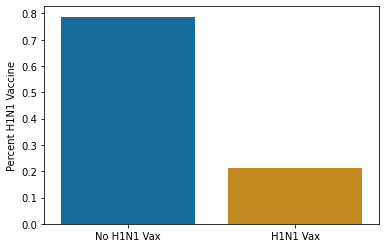

In [11]:
# Look at the proportion of respondents who have recieved the H1N1 Vaccine

fig, ax = plt.subplots()

sns.barplot(x=vax_prop.index, y=vax_prop.values)

ax.set_xlabel('')
ax.set_ylabel('Percent H1N1 Vaccine')

ax.set_xticklabels(['No H1N1 Vax', 'H1N1 Vax'])

In [12]:
df.groupby('age_group').sum().h1n1_vaccine

age_group
18 - 34 Years     991
35 - 44 Years     761
45 - 54 Years    1020
55 - 64 Years    1351
65+ Years        1551
Name: h1n1_vaccine, dtype: int64

In [13]:
df.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

18 - 34 Years    0.190029
35 - 44 Years    0.197765
45 - 54 Years    0.194731
55 - 64 Years    0.242855
65+ Years        0.226655
dtype: float64


Text(0, 0.5, 'Percent H1N1 Vaccine')

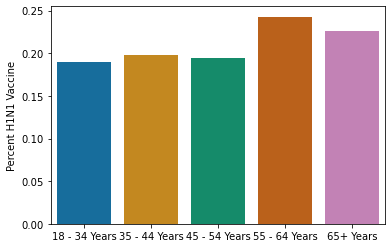

In [14]:
# H1N1 vaccination percenta by age group

# Count of H1N1 vaccinations by age group
df.groupby('age_group').sum().h1n1_vaccine

#Count of age group interviewed
df.age_group.value_counts()

# Calculate percent of H1N1 vaccination by age group
per_h1_age = df.groupby('age_group').sum().h1n1_vaccine / df.age_group.value_counts()
print(per_h1_age)

fig, ax = plt.subplots()

sns.barplot(x=per_h1_age.index, y=per_h1_age.values)

ax.set_xlabel('')
ax.set_ylabel('Percent H1N1 Vaccine')

In [28]:
h1n1_rates_age = df.groupby('age_group').mean().h1n1_vaccine
print(h1n1_rates_age, '\n')
h1n1_rates_education = df.groupby('education').mean().h1n1_vaccine
print(h1n1_rates_education)
h1n1_rates_race = df.groupby('race').mean().h1n1_vaccine
print(h1n1_rates_race, '\n')
h1n1_rates_sex = df.groupby('sex').mean().h1n1_vaccine
print(h1n1_rates_sex, '\n')
h1n1_rates_income = df.groupby('income_poverty').mean().h1n1_vaccine
print(h1n1_rates_income, '\n')
h1n1_rates_marital = df.groupby('marital_status').mean().h1n1_vaccine
print(h1n1_rates_marital, '\n')
h1n1_rates_own = df.groupby('rent_or_own').mean().h1n1_vaccine
print(h1n1_rates_own, '\n')
h1n1_rates_employment_status = df.groupby('employment_status').mean().h1n1_vaccine
print(h1n1_rates_employment_status, '\n')
h1n1_rates_geo = df.groupby('hhs_geo_region').mean().h1n1_vaccine.sort_values(ascending=False)
print(h1n1_rates_geo, '\n')
h1n1_rates_census = df.groupby('census_msa').mean().h1n1_vaccine
print(h1n1_rates_census, '\n')
h1n1_rates_employment_industry = df.groupby('employment_industry').mean().h1n1_vaccine.sort_values(ascending=False)
print(h1n1_rates_employment_industry, '\n')
h1n1_rates_employment_occupation = df.groupby('employment_occupation').mean().h1n1_vaccine.sort_values(ascending=False)
print(h1n1_rates_employment_occupation)


h1n1_rates_for_bar_cat = [h1n1_rates_age, h1n1_rates_education,
                         h1n1_rates_race, h1n1_rates_sex,
                         h1n1_rates_income, h1n1_rates_marital,
                         h1n1_rates_own, h1n1_rates_employment_status,
                         h1n1_rates_geo, h1n1_rates_census,
                         h1n1_rates_employment_industry, h1n1_rates_employment_occupation]

age_group
18 - 34 Years    0.190029
35 - 44 Years    0.197765
45 - 54 Years    0.194731
55 - 64 Years    0.242855
65+ Years        0.226655
Name: h1n1_vaccine, dtype: float64 

education
12 Years            0.184751
< 12 Years          0.167160
College Graduate    0.245915
Some College        0.207866
Name: h1n1_vaccine, dtype: float64
race
Black                0.148725
Hispanic             0.207977
Other or Multiple    0.216501
White                0.218877
Name: h1n1_vaccine, dtype: float64 

sex
Female    0.219448
Male      0.202231
Name: h1n1_vaccine, dtype: float64 

income_poverty
<= $75,000, Above Poverty    0.203412
> $75,000                    0.253010
Below Poverty                0.191324
Name: h1n1_vaccine, dtype: float64 

marital_status
Married        0.233714
Not Married    0.191587
Name: h1n1_vaccine, dtype: float64 

rent_or_own
Own     0.221979
Rent    0.188733
Name: h1n1_vaccine, dtype: float64 

employment_status
Employed              0.215560
Not in Labor Force    0

In [29]:
for i in h1n1_rates_for_bar_cat:
    print(i, ': ', i.max() - i.min(), '\n')

age_group
18 - 34 Years    0.190029
35 - 44 Years    0.197765
45 - 54 Years    0.194731
55 - 64 Years    0.242855
65+ Years        0.226655
Name: h1n1_vaccine, dtype: float64 :  0.05282581168654904 

education
12 Years            0.184751
< 12 Years          0.167160
College Graduate    0.245915
Some College        0.207866
Name: h1n1_vaccine, dtype: float64 :  0.07875423877176826 

race
Black                0.148725
Hispanic             0.207977
Other or Multiple    0.216501
White                0.218877
Name: h1n1_vaccine, dtype: float64 :  0.07015142498711185 

sex
Female    0.219448
Male      0.202231
Name: h1n1_vaccine, dtype: float64 :  0.01721697709349479 

income_poverty
<= $75,000, Above Poverty    0.203412
> $75,000                    0.253010
Below Poverty                0.191324
Name: h1n1_vaccine, dtype: float64 :  0.06168658600925486 

marital_status
Married        0.233714
Not Married    0.191587
Name: h1n1_vaccine, dtype: float64 :  0.042127303035267544 

rent_or_own
Ow

In [27]:
h1n1_rates_for_bar_cat

[age_group
 18 - 34 Years    0.190029
 35 - 44 Years    0.197765
 45 - 54 Years    0.194731
 55 - 64 Years    0.242855
 65+ Years        0.226655
 Name: h1n1_vaccine, dtype: float64]

In [ ]:
df_exp = df.drop(['respondent_id', 'respondent_id_tars'], axis=1)

In [33]:
# df_exp_h1n1_pos = df_exp[df_exp['h1n1_vaccine'] == 1]

# df_exp_h1n1_pos.select_dtypes(np.number).groupby('h1n1_vaccine').mean()

In [34]:
h1n1_rates_houseadlt = df_exp.groupby('household_adults').mean().h1n1_vaccine
h1n1_rates_housechld = df_exp.groupby('household_children').mean().h1n1_vaccine
print(h1n1_rates_houseadlt, '\n')
print(h1n1_rates_housechld, '\n')

h1n1_rates_concern = df_exp.groupby('h1n1_concern').mean().h1n1_vaccine
h1n1_rates_knowledge = df_exp.groupby('h1n1_knowledge').mean().h1n1_vaccine
print(h1n1_rates_concern, '\n')
print(h1n1_rates_knowledge, '\n')

h1n1_rates_op_effective = df_exp.groupby('opinion_h1n1_vacc_effective').mean().h1n1_vaccine
h1n1_rates_op_risk = df_exp.groupby('opinion_h1n1_risk').mean().h1n1_vaccine
h1n1_rates_op_sickfromvac = df_exp.groupby('opinion_h1n1_sick_from_vacc').mean().h1n1_vaccine
print(h1n1_rates_op_affective, '\n')
print(h1n1_rates_op_risk, '\n')
print(h1n1_rates_op_sickfromvac, '\n')

h1b1_rates_for_bar_ord = [h1n1_rates_houseadlt, h1n1_rates_housechld, 
                      h1n1_rates_concern, h1n1_rates_knowledge, 
                      h1n1_rates_op_effective, h1n1_rates_op_risk,
                      h1n1_rates_op_sickfromvac]

NameError: name 'df_exp' is not defined

In [35]:
for i in h1b1_rates_for_bar_ord:
    print(i, ': ', i.max() - i.min(), '\n')

NameError: name 'h1b1_rates_for_bar_ord' is not defined

In [36]:
sns.barplot(x=h1n1_rates_op_risk.index, y=h1n1_rates_op_risk.values)

NameError: name 'h1n1_rates_op_risk' is not defined

In [37]:
sns.barplot(x=h1n1_rates_op_effective.index, y=h1n1_rates_op_effective.values)

NameError: name 'h1n1_rates_op_effective' is not defined

In [38]:
sns.barplot(x=h1n1_rates_op_sickfromvac.index, y=h1n1_rates_op_sickfromvac.values)

NameError: name 'h1n1_rates_op_sickfromvac' is not defined

In [30]:
h1n1_rates_beh_virmeds = df_exp.groupby('behavioral_antiviral_meds').mean().h1n1_vaccine
h1n1_rates_beh_avoid = df_exp.groupby('behavioral_avoidance').mean().h1n1_vaccine

h1n1_rates_beh_facemask = df_exp.groupby('behavioral_face_mask').mean().h1n1_vaccine
h1n1_rates_beh_washhands = df_exp.groupby('behavioral_wash_hands').mean().h1n1_vaccine

h1n1_rates_beh_gatherings = df_exp.groupby('behavioral_large_gatherings').mean().h1n1_vaccine
h1n1_rates_beh_outside = df_exp.groupby('behavioral_outside_home').mean().h1n1_vaccine

h1n1_rates_beh_touchface = df_exp.groupby('behavioral_touch_face').mean().h1n1_vaccine
h1n1_rates_docrec = df_exp.groupby('doctor_recc_h1n1').mean().h1n1_vaccine

h1n1_rates_chroncond = df_exp.groupby('chronic_med_condition').mean().h1n1_vaccine
h1n1_rates_childund6 = df_exp.groupby('child_under_6_months').mean().h1n1_vaccine

h1n1_rates_healthworker = df_exp.groupby('health_worker').mean().h1n1_vaccine
h1n1_rates_insurance = df_exp.groupby('health_insurance').mean().h1n1_vaccine

print(h1n1_rates_insurance, '\n')
print(h1n1_rates_beh_avoid, '\n')
print(h1n1_rates_beh_facemask, '\n')
print(h1n1_rates_beh_washhands, '\n')
print(h1n1_rates_beh_gatherings, '\n')
print(h1n1_rates_beh_outside, '\n')
print(h1n1_rates_beh_touchface, '\n')
print(h1n1_rates_docrec, '\n')
print(h1n1_rates_chroncond, '\n')
print(h1n1_rates_childund6, '\n')
print(h1n1_rates_healthworker, '\n')
print(h1n1_rates_insurance, '\n')

h1b1_rates_for_bar_binary = [h1n1_rates_beh_virmeds,
h1n1_rates_beh_avoid,
h1n1_rates_beh_facemask,
h1n1_rates_beh_washhands,
h1n1_rates_beh_gatherings,
h1n1_rates_beh_outside,
h1n1_rates_beh_touchface,
h1n1_rates_docrec,
h1n1_rates_chroncond,
h1n1_rates_childund6,
h1n1_rates_healthworker,
h1n1_rates_insurance]

NameError: name 'df_exp' is not defined

In [31]:
for i in h1b1_rates_for_bar_binary:
    print(i, ': ', i.max() - i.min(), '\n')

NameError: name 'h1b1_rates_for_bar_binary' is not defined

In [ ]:
sns.barplot(x=h1n1_rates_docrec.index, y=h1n1_rates_docrec.values)

In [ ]:
fig, ax = plt.subplots()

sns.barplot(x=h1n1_rates_healthworker.index, y=h1n1_rates_healthworker.values)

ax.set_xlabel('')
ax.set_ylabel('Percent H1N1 Vaccine')

ax.set_xticklabels(['Not Health Worker', 'Health Worker'])

In [ ]:
# HEY JUSTIN WHY DOESNT THIS ADD UP TO 1??

h1n1_rates_healthworkeraskljdg = df_exp.groupby('h1n1_vaccine').mean().health_worker

h1n1_rates_healthworkeraskljdg

# fig, ax = plt.subplots()

# sns.barplot(x=h1n1_rates_healthworkeraskljdg.index, y=h1n1_rates_healthworkeraskljdg.values)

# ax.set_xlabel('')
# ax.set_ylabel('Percent H1N1 Vaccine')

# ax.set_xticklabels(['Not Health Worker', 'Health Worker'])

In [ ]:
sns.barplot(x=h1n1_rates_op_effective.index, y=h1n1_rates_op_effective.values)

In [ ]:
h1n1_rates_healthworker

In [ ]:
df.select_dtypes(include='object').describe()

In [ ]:
print(df['age_group'].value_counts())

In [ ]:
for column in df.select_dtypes(include='object'):
    columnSeriesObj = df.select_dtypes(include='object')[column]
    print(column,': \n', columnSeriesObj.value_counts(), '\n \n',
         columnSeriesObj.value_counts(normalize=True), '\n')

In [ ]:
df.shape

In [ ]:
X = df.drop(['respondent_id', 'respondent_id_tars',
            'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df.h1n1_vaccine

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
# Numeric Pipeline

num_pipe = Pipeline([
    ('num_impute', SimpleImputer(strategy='mean'))
])

# Categorical Pipeline

cat_pipe = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [ ]:
CT = ColumnTransformer([
    ('num_trans', num_pipe, selector(dtype_include=np.number)),
    ('cat_trans', cat_pipe, selector(dtype_include=object))
], remainder='passthrough')

In [ ]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [ ]:
# Create Dummy/Baseline

dummy_model = Pipeline([
    ('ct', CT),
    ('dummy', DummyClassifier(strategy='most_frequent'))
])

In [ ]:
# Use the class with our dummy pipe

dummy_model_pipe = ModelWithCV(dummy_model, model_name='dummy', X=X_train, y=y_train)

In [ ]:

dummy_model_pipe.print_cv_summary()

In [ ]:
# Use the class with out logreg pipe

logreg_fsm = Pipeline([
    ('ct', CT),
    ('logreg_fsm', LogisticRegression(random_state=42, max_iter=1000))
])

In [ ]:
fsm_model_pipe = ModelWithCV(logreg_fsm, model_name='fsm', X=X_train, y=y_train)

In [ ]:
fsm_model_pipe.print_cv_summary()

In [ ]:
fig,ax = plt.subplots()

fsm_model_pipe.plot_cv(ax=ax)

In [ ]:
# rfc!

rfc = RandomForestClassifier(random_state=42)

rfc_model_pipe = ImPipeline([
    ('ct', CT),
    ('sm', SMOTE(random_state=42)),
    ('rfc', rfc)])

forest_pipe = ModelWithCV(model=rfc_model_pipe,
                          model_name='forest_pipe',
                          X=X_train,
                          y=y_train)

fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax);

In [ ]:
forest_pipe.print_cv_summary()

In [ ]:
# Logistic Regression

lr = LogisticRegression(random_state=42)

lr_model_pipe = ImPipeline([
    ('ct', CT),
    ('sm', SMOTE(random_state=42)),
    ('lr', lr)
])

lr_params = {
    'ct__num_trans__num_impute__strategy' : ['mean', 'median'],
    'lr__penalty' : ['l1', 'l2', 'elasticnet'],
    'lr__solver' : ['lbfgs', 'liblinear', 'saga'],
    'lr__max_iter' : [100, 1000, 5000]
}


# Random Forest Classsifier

rfc = RandomForestClassifier(random_state=42)

rfc_model_pipe = ImPipeline([
    ('ct', CT),
    ('sm', SMOTE(random_state=42)),
    ('rfc', rfc)])

rfc_params = {
    'ct__num_trans__num_impute__strategy' : ['mean', 'median'],
    'rfc__criterion' : ['gini', 'entropy', 'log_loss'],
    'rfc__max_depth' : [11, 13, 15, 17],
    'rfc__min_samples_leaf' : [1, 5, 15, 25, 50, 75, 100]
}

# K-Nearest Neighbors Classifier

knn = KNeighborsClassifier()

knn_model_pipe = ImPipeline([
    ('ct', CT),
    ('sm', SMOTE(random_state=42)),
    ('knn', knn)])

knn_params = {
    'ct__num_trans__num_impute__strategy' : ['mean', 'median'],
    'knn__n_neighbors' : [1, 3, 5, 7, 9, 11],
    'knn__weights' : ['uniform', 'distance'],
    'knn__leaf_size' : [20, 30, 40],
    'knn__metric' : ['minkowski', 'cityblock']
}

# Gaussian Naive Bayes

GNB = GaussianNB()

GNB_model_pipe = ImPipeline([
    ('ct', CT),
    ('sm', SMOTE(random_state=42)),
    ('GNB', GNB)])

GNB_params = {
    'ct__num_trans__num_impute__strategy' : ['mean', 'median'],
}

In [ ]:
gs = GridSearchCV(estimator=lr_model_pipe, param_grid=lr_params, cv=10, verbose=2)

gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_.score(X_test, y_test)

In [ ]:
gs = GridSearchCV(estimator=rfc_model_pipe, param_grid=rfc_params, cv=10, verbose=2)

gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_.score(X_test, y_test)

In [ ]:
gs = GridSearchCV(estimator=knn_model_pipe, param_grid=knn_params, cv=10, verbose=2)

gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_.score(X_test, y_test)

In [ ]:
gs = GridSearchCV(estimator=GNB_model_pipe, param_grid=GNB_params, cv=10, verbose=2)

gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_.score(X_test, y_test)

In [ ]:
rfc_params = {
    'ct__num_trans__num_impute__strategy' : ['mean', 'median'],
    'rfc__criterion' : ['gini', 'entropy', 'log_loss'],
    'rfc__max_depth' : [11, 13, 15, 17],
    'rfc__min_samples_leaf' : [1, 5, 15, 25, 50, 75, 100]
}

gs = GridSearchCV(estimator=rfc_model_pipe, param_grid=rfc_params, cv=10, verbose=2)

gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_.score(X_test, y_test)